In [2]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

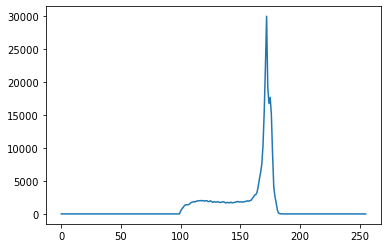

-1

In [3]:
src = cv2.imread('./fig/puppy_shrink.png', 0)

hist = cv2.calcHist([src], [0], None, [256], [0, 256])

cv2.imshow('src', src)

plt.plot(hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

# 수동 노멀라이즈 방식

100.0 184.0


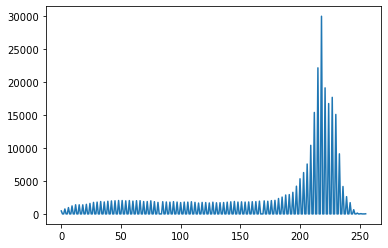

-1

In [6]:
src = cv2.imread('./fig/puppy_shrink.png', 0)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src)
print(minVal, maxVal)

dst_norm = np.clip((src - minVal) * 255. / (maxVal - minVal) + 0, 0, 255).astype(np.uint8)

hist = cv2.calcHist([dst_norm], [0], None, [256], [0, 256])

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)

plt.plot(hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

# 자동 노멀라이즈

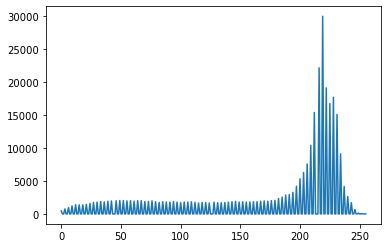

-1

In [7]:
src = cv2.imread('./fig/puppy_shrink.png', 0)


dst_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1)

hist = cv2.calcHist([dst_norm], [0], None, [256], [0, 256])

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)

plt.plot(hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

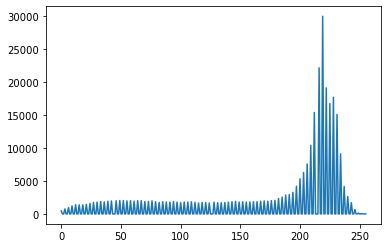

-1

In [8]:
src = cv2.imread('./fig/puppy_shrink.png', 0)


dst_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1)
dst_equal = cv2.equalizeHist(src)

hist = cv2.calcHist([dst_norm], [0], None, [256], [0, 256])

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_equal', dst_equal)

plt.plot(hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## 케이스 별로 normalize 과 equalizeHist 좋은게 다르다

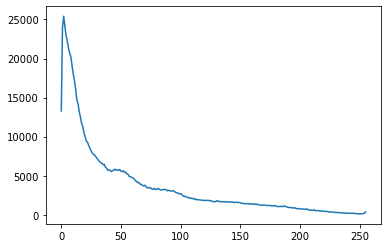

-1

In [9]:
src = cv2.imread('./fig/manjang.jpg', 0)


dst_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1)
dst_equal = cv2.equalizeHist(src)

hist = cv2.calcHist([dst_norm], [0], None, [256], [0, 256])

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_equal', dst_equal)

plt.plot(hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

# 중요!! 칼라 영상에 대해서 normalize

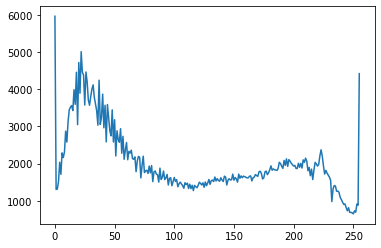

-1

In [16]:
# norm, equl 밝기에 대해서 하는거기에 bgr에서 할수가 없다
src = cv2.imread('./fig/spring_in_park.jpg', cv2.IMREAD_REDUCED_COLOR_2) 

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(src_hsv)

v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX, -1) # v 가 밝기
v_equal = cv2.equalizeHist(v)

dst_norm = cv2.merge((h, s, v_norm))
dst_equal = cv2.merge((h, s, v_equal))

dst_norm = cv2.cvtColor(dst_norm, cv2.COLOR_HSV2BGR)
dst_equal = cv2.cvtColor(dst_equal, cv2.COLOR_HSV2BGR)

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_equal', dst_equal)

hist = cv2.calcHist([dst_norm], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

In [26]:
src = cv2.imread('./fig/palette.png')

dst_bgr = cv2.inRange(src, (0,0,0), (255, 255, 255)) # b, g, r 에 대해서 각각 최소 값과 최대값을 넣는다

dst_bgr = cv2.inRange(src, (0,0,128), (50, 50, 255))

cv2.imshow('src', src)
cv2.imshow('dst_bgr', dst_bgr)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [32]:
# src = cv2.imread('./fig/palette.png')
src = cv2.imread('./fig/palette_dark.png')

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# dst_bgr = cv2.inRange(src, (0,0,0), (255, 255, 255)) # b, g, r 에 대해서 각각 최소 값과 최대값을 넣는다

dst_hsv = cv2.inRange(src_hsv, (110,180,0), (130, 255, 255))

cv2.imshow('src', src)
cv2.imshow('dst_hsv', dst_hsv)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [34]:
def call_trackbar(pos) :
    hmin = cv2.getTrackbarPos('h_min', 'image')
    hmax = cv2.getTrackbarPos('h_max', 'image')
    smin = cv2.getTrackbarPos('s_min', 'image')
    
    
    dst = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow('image', dst)
    
    
src = cv2.imread('./fig/palette.png')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.namedWindow('image')
cv2.createTrackbar('h_min', 'image', 50 , 179, call_trackbar)
cv2.createTrackbar('h_max', 'image', 100 , 179, call_trackbar)
cv2.createTrackbar('s_min', 'image', 100 , 255, call_trackbar)

cv2.imshow('src',src)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

# trackbar 를 이용한 크로마키 영상 만들기

In [46]:
def call_trackbar(pos) :
    hmin = cv2.getTrackbarPos('h_min', 'mask')
    hmax = cv2.getTrackbarPos('h_max', 'mask')
    smin = cv2.getTrackbarPos('s_min', 'mask')
    
    mask = cv2.inRange(dst_hsv, (hmin, smin, 0), (hmax, 255, 255))
    
    cv2.imshow('mask', mask)
    dst1 = dst.copy()
    cv2.copyTo(src, mask , dst1)
    
    cv2.imshow('dst', dst1)

src = cv2.imread('./fig/autumn.jpg')
dst = cv2.imread('./fig/chromakey.png')



h, w = dst.shape[:2]
src = cv2.resize(src, (w, h), interpolation = cv2.INTER_AREA)

dst_hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)

cv2.namedWindow('mask')
cv2.createTrackbar('h_min', 'mask', 50, 179, call_trackbar)
cv2.createTrackbar('h_max', 'mask', 70, 179, call_trackbar)
cv2.createTrackbar('s_min', 'mask', 0, 255, call_trackbar)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1